In [30]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [31]:
import numpy as np
import pandas as pd

In [32]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [33]:
# Python SQL toolkit and Object Relational Mapper
import datetime
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [34]:
# # reflect the tables
# Base.metadata.tables

In [35]:
# Create our database engine
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [36]:
# Declare a Base using `automap_base()`
Base = automap_base()
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)


In [37]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [38]:
# # This is where we create our tables in the database
# Base.metadata.create_all(engine)

In [39]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [40]:
# The ORM’s “handle” to the database is the Session.
from sqlalchemy.orm import Session
session = Session(engine)

In [41]:
# Display the row's columns and data in dictionary format
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1cf970f44c0>,
 'id': 1,
 'date': '2010-01-01',
 'prcp': 0.08,
 'tobs': 65.0,
 'station': 'USC00519397'}

In [42]:
# Display the row's columns and data in dictionary format
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1cf9711fa60>,
 'id': 1,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'latitude': 21.2716,
 'station': 'USC00519397',
 'elevation': 3.0}

# Exploratory Climate Analysis

In [43]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [44]:
session.query(Measurement.date).order_by(Measurement.date).first()

('2010-01-01',)

In [45]:
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [46]:
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", query_date)

Query Date:  2016-08-23


In [47]:
last_12momths_results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date> '2016-08-23').\
    order_by(Measurement.date).all()
last_12momths_results

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [142]:
# Use Pandas to calcualte the summary statistics for the precipitation dataprint
precipitation_df = pd.DataFrame(last_12momths_results, columns=['Date', 'Precipitation'])
precipitation_df

,Date,Precipitation
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22
...,...,...
2218,2017-08-22,0.50
2219,2017-08-23,0.00
2220,2017-08-23,0.00
2221,2017-08-23,0.08


In [143]:
prcp_count_df = precipitation_df.sort_values("Date", ascending = True)
prcp_count_df 

,Date,Precipitation
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22
...,...,...
2218,2017-08-22,0.50
2221,2017-08-23,0.08
2219,2017-08-23,0.00
2220,2017-08-23,0.00


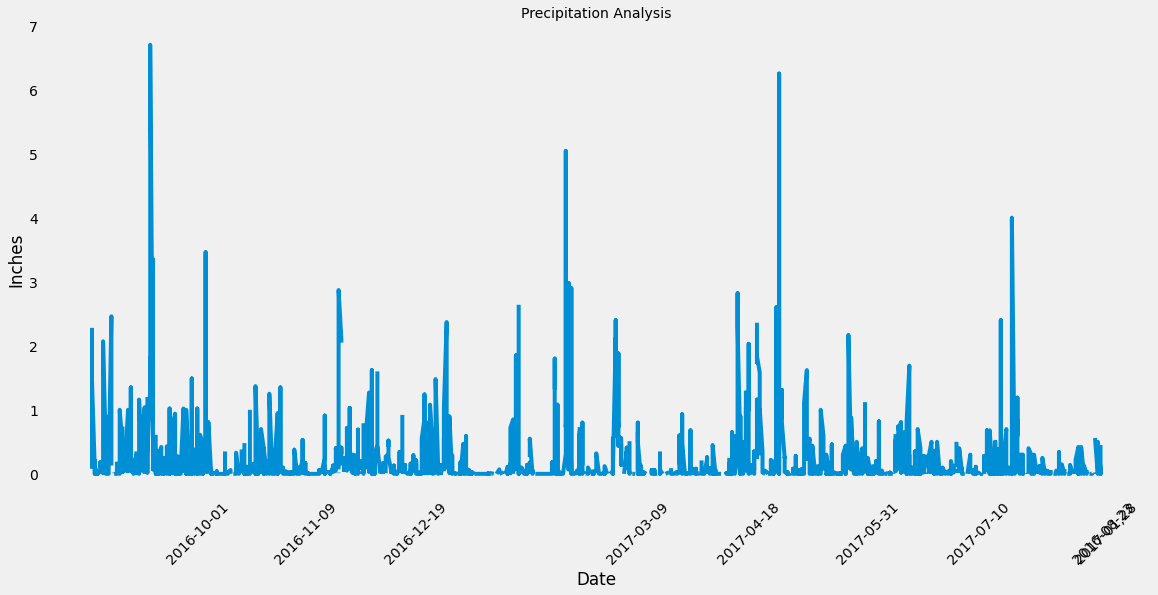

In [146]:
xloc=["2016-08-23", "2016-10-01", "2016-11-09", "2016-12-19", "2017-01,28", "2017-03-09", "2017-04-18", "2017-05-31", "2017-07-10"]
x_axis = prcp_count_df["Date"]
y_axis = prcp_count_df["Precipitation"]
fig1, ax1 = plt.subplots(figsize=(16,8))
plt.plot(x_axis, y_axis)
plt.xticks(xloc, rotation = 45)
plt.grid()
plt.tight_layout()
plt.title('Precipitation Analysis', size="14")
plt.xlabel('Date')
plt.ylabel('Inches')
plt.savefig("Precipitation Analysis.png")
plt.show()

In [147]:
precipitation_df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [52]:
# Design a query to show how many stations are available in this dataset?


In [53]:
station = session.query(Station.station)
for station in station:
    print(station)


('USC00519397',)
('USC00513117',)
('USC00514830',)
('USC00517948',)
('USC00518838',)
('USC00519523',)
('USC00519281',)
('USC00511918',)
('USC00516128',)


In [54]:
no_station = session.query(Station.station).count()

print(f"Total number of stations {no_station}")

Total number of stations 9


In [55]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
most_active_station = session.query(Measurement.station)
for station in most_active_station:
    print(station)

('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397'

In [120]:

most_active_station= session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
active_station = most_active_station[0][0]
most_active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [57]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [126]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
TOBS = session.query(Measurement.tobs, Measurement.date)
for tobs in TOBS:
    print(tobs)

(65.0, '2010-01-01')
(63.0, '2010-01-02')
(74.0, '2010-01-03')
(76.0, '2010-01-04')
(73.0, '2010-01-06')
(70.0, '2010-01-07')
(64.0, '2010-01-08')
(68.0, '2010-01-09')
(73.0, '2010-01-10')
(64.0, '2010-01-11')
(61.0, '2010-01-12')
(66.0, '2010-01-14')
(65.0, '2010-01-15')
(68.0, '2010-01-16')
(64.0, '2010-01-17')
(72.0, '2010-01-18')
(66.0, '2010-01-19')
(66.0, '2010-01-20')
(69.0, '2010-01-21')
(67.0, '2010-01-22')
(67.0, '2010-01-23')
(71.0, '2010-01-24')
(67.0, '2010-01-25')
(76.0, '2010-01-26')
(68.0, '2010-01-27')
(72.0, '2010-01-28')
(70.0, '2010-01-30')
(67.0, '2010-01-31')
(66.0, '2010-02-01')
(67.0, '2010-02-03')
(69.0, '2010-02-04')
(67.0, '2010-02-05')
(67.0, '2010-02-06')
(64.0, '2010-02-07')
(69.0, '2010-02-08')
(73.0, '2010-02-09')
(73.0, '2010-02-11')
(69.0, '2010-02-12')
(69.0, '2010-02-13')
(69.0, '2010-02-14')
(71.0, '2010-02-15')
(61.0, '2010-02-16')
(69.0, '2010-02-17')
(63.0, '2010-02-19')
(64.0, '2010-02-20')
(65.0, '2010-02-21')
(67.0, '2010-02-22')
(68.0, '2010-

In [137]:
temp_observation_df = session.query(Measurement.tobs).\
    filter(Measurement.date> '2016-08-23').\
    filter(Measurement.station == most_active_station[0][0])
temp_observation_df

In [138]:
temp_observation_df = pd.DataFrame(temp_observation_df)
temp_observation_df

,0
0,77.0
1,80.0
2,80.0
3,75.0
4,73.0
...,...
346,77.0
347,77.0
348,76.0
349,76.0


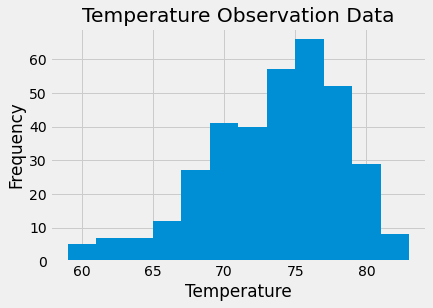

In [139]:

plt.hist(temp_observation_df, bins = 12)
plt.title('Temperature Observation Data')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

## Bonus Challenge Assignment

In [63]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [64]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [65]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [66]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [67]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [68]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [69]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [70]:
# Plot the daily normals as an area plot with `stacked=False`
